In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split as tts

In [96]:
pd.options.display.float_format = '{:.2f}'.format

In [98]:
data = pd.read_csv('l_fin_comp.csv')

In [100]:
data.columns = data.columns.str.replace('(USD Millions)', 'USD Millions')
data.columns = data.columns.str.replace('(USD Million)', 'USD Million')
#data.columns[3:3] = data.columns[3:3].str.replace('(USD Million)', 'USD Million')
data.columns = data.columns.str.replace(' ', '_')

In [102]:
data

,Rank,Company,Industry,Revenue_in_USD_Million,Net_Income_in_USD_Millions,Total_Assest_in_USD_Millions,Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China
5,6,China Life Insurance,Insurance,144589,4648,776,China
6,7,Allianz,Insurance,136173,7756,1297,Germany
7,8,Bank of China,Banking,134045,27952,3739,China
8,9,JP Morgan Chase,Banking,129503,29131,3386,United States
9,10,AXA,Insurance,128011,3605,984,France


In [103]:
industry_group = data.groupby(['Headquarters']).agg({'Company': pd.Series.count})

mrg_df = data[['Headquarters','Industry']]

industry_group = pd.merge(industry_group, mrg_df, on='Headquarters')

In [105]:
pie = px.pie(industry_group, labels ='Industry', values='Company', names='Industry', title='Industyr pie')
pie.update_layout(height=1500)
pie.show()

In [106]:
pie = px.pie(industry_group, labels ='Headquarters', values='Company', names='Headquarters', title='Headquarter pie')
pie.update_layout(height=1500)
pie.show()

In [107]:
columns = data.columns.values

In [108]:
rev_inc_head = data[['Revenue_in_USD_Million', 'Net_Income_in_USD_Millions', 'Headquarters',]]

In [109]:
rv_inc_hd_sort = rev_inc_head.sort_values('Net_Income_in_USD_Millions', ascending=False)

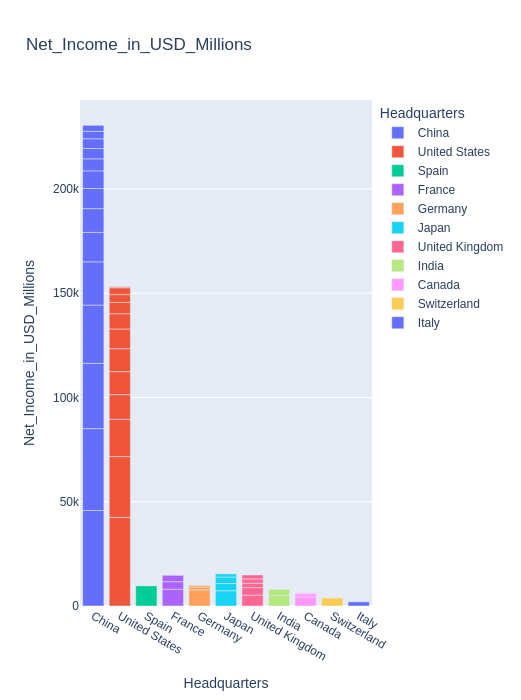

In [111]:
fig = px.bar(rv_inc_hd_sort, x=rv_inc_hd_sort.Headquarters, y=rv_inc_hd_sort['Net_Income_in_USD_Millions'], color='Headquarters', color_continuous_scale='GnBu', title='Net_Income_in_USD_Millions')
fig.update_layout(height=700, width=1500)
fig.show()

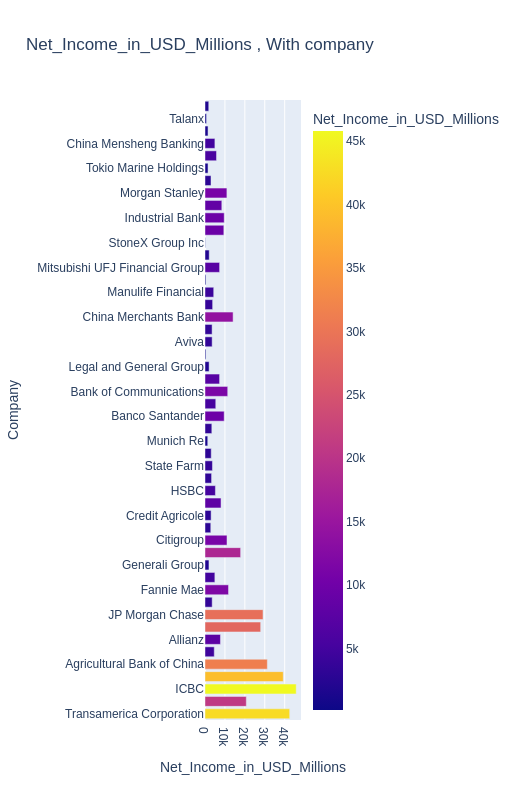

In [112]:
fig_2 = px.bar(data, x='Net_Income_in_USD_Millions', y='Company', title='Net_Income_in_USD_Millions	, With company', color='Net_Income_in_USD_Millions')
fig_2.update_layout(height=800)
fig_2.show()

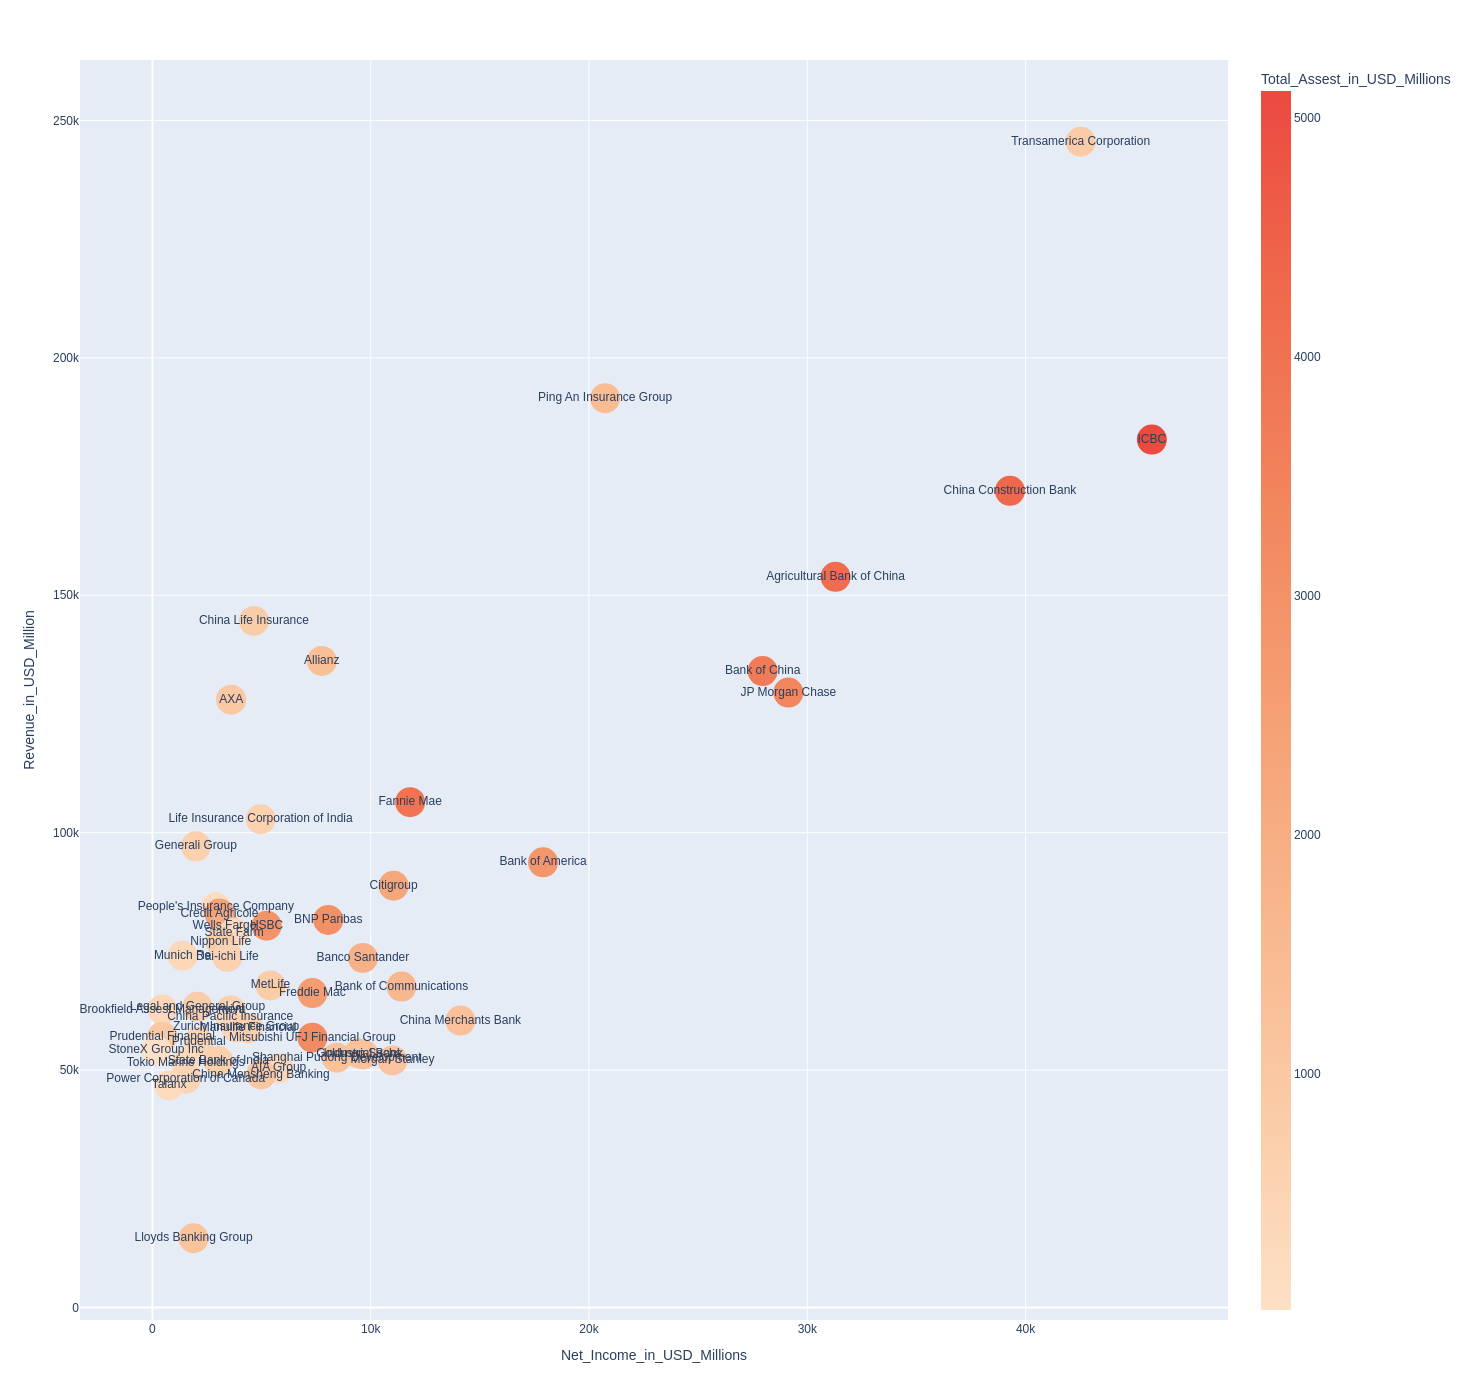

In [143]:
fig3 = px.scatter(data, 
                  x='Net_Income_in_USD_Millions', 
                  y='Revenue_in_USD_Million', 
                  color='Total_Assest_in_USD_Millions',
                  hover_name = 'Company',
                  size = 'Net_Income_in_USD_Millions',
                  color_continuous_scale = 'peach',
                 text='Company')
fig3.update_traces(marker=dict(size=30))
fig3.update_layout(height=1400, width=1500)
fig3.show()

In [122]:
industry_net = data.groupby('Industry', as_index=False).agg({'Net_Income_in_USD_Millions': pd.Series.mean})


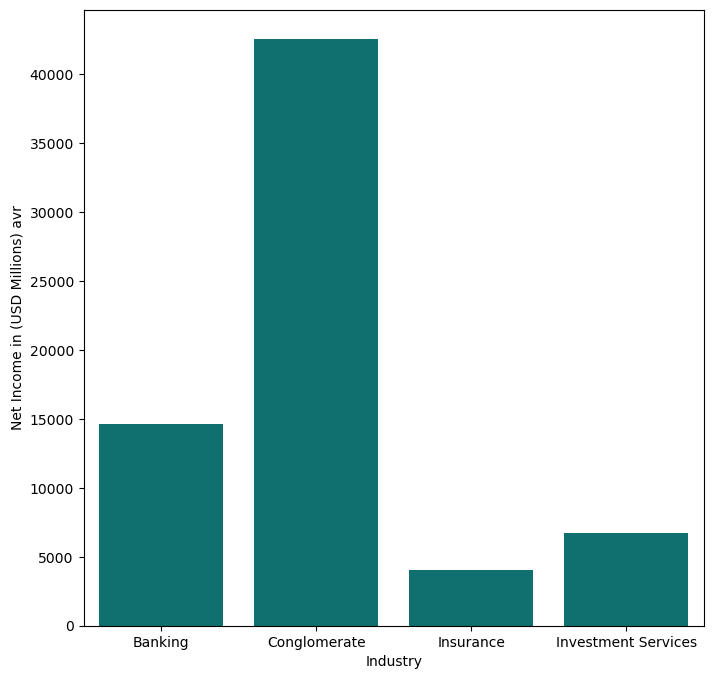

In [125]:
plt.figure(figsize=(8, 8))
sns.barplot(industry_net, y='Net_Income_in_USD_Millions', x='Industry', color='teal')
plt.ylabel('Net Income in (USD Millions) avr')
#plt.savefig('Largest_ fin _serv')
plt.show()

In [126]:
industry_rev = data.groupby('Industry').agg({'Revenue_in_USD_Million': pd.Series.mean})

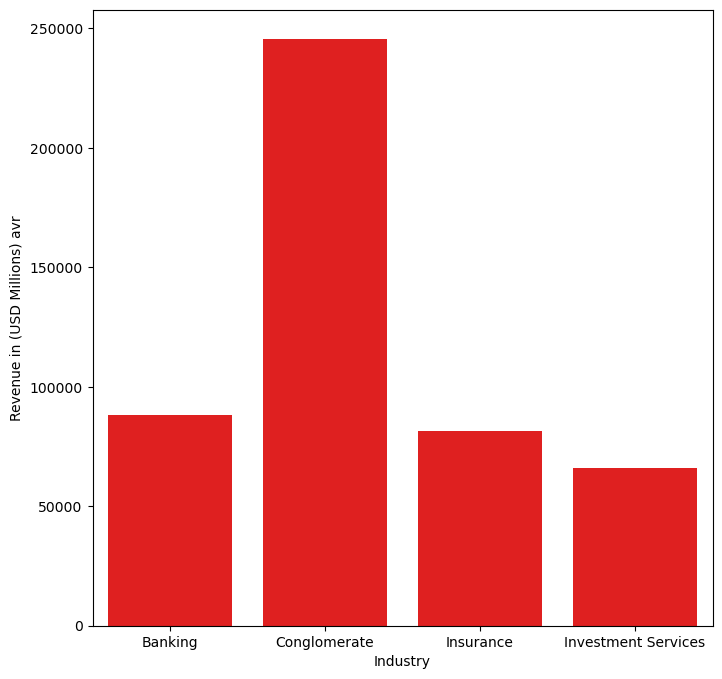

In [127]:
plt.figure(figsize=(8, 8))
sns.barplot(industry_rev, y='Revenue_in_USD_Million', x='Industry', color='red')
plt.ylabel('Revenue in (USD Millions) avr')
plt.savefig('Ind_rev')
plt.show()

In [131]:
data

,Rank,Company,Industry,Revenue_in_USD_Million,Net_Income_in_USD_Millions,Total_Assest_in_USD_Millions,Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China
5,6,China Life Insurance,Insurance,144589,4648,776,China
6,7,Allianz,Insurance,136173,7756,1297,Germany
7,8,Bank of China,Banking,134045,27952,3739,China
8,9,JP Morgan Chase,Banking,129503,29131,3386,United States
9,10,AXA,Insurance,128011,3605,984,France


In [133]:
data.Revenue_in_USD_Million.describe()


count       50.00
mean     85435.12
std      44689.15
min      14592.00
25%      56189.25
50%      70736.00
75%      96284.25
max     245510.00
Name: Revenue_in_USD_Million, dtype: float64

In [135]:
data.Net_Income_in_USD_Millions.describe()

count      50.00
mean     9369.32
std     11101.19
min       169.00
25%      3030.25
50%      4963.00
75%     10660.75
max     45783.00
Name: Net_Income_in_USD_Millions, dtype: float64

In [137]:
data.Total_Assest_in_USD_Millions.describe()	

count     50.00
mean    1480.46
std     1282.84
min       13.00
25%      588.00
50%     1024.50
75%     2183.75
max     5110.00
Name: Total_Assest_in_USD_Millions, dtype: float64